## Heart-Disease-Classification

1. **Data**: he original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
2. **Problem**: Binary-Classification problem
3. **Evaluation**: 90% accuracy
4. **Features**: below

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# Data mining and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot appears in jupyter
%matplotlib inline

# Training model
from sklearn.linear_model import LogisticRegression #邏輯回歸
from sklearn.naive_bayes import GaussianNB # 貝式分類器
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.ensemble import RandomForestClassifier # 隨機森林
from sklearn.svm import SVC # 支持向量機

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score # 拆分 train set 及 test set
from sklearn.model_selection import GridSearchCV # tuning hyperparameters
from sklearn.metrics import confusion_matrix, classification_report # evaluation
from sklearn.metrics import precision_score, recall_score, f1_score # evaluation
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay # visualization

In [2]:
df = pd.read_csv('./heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


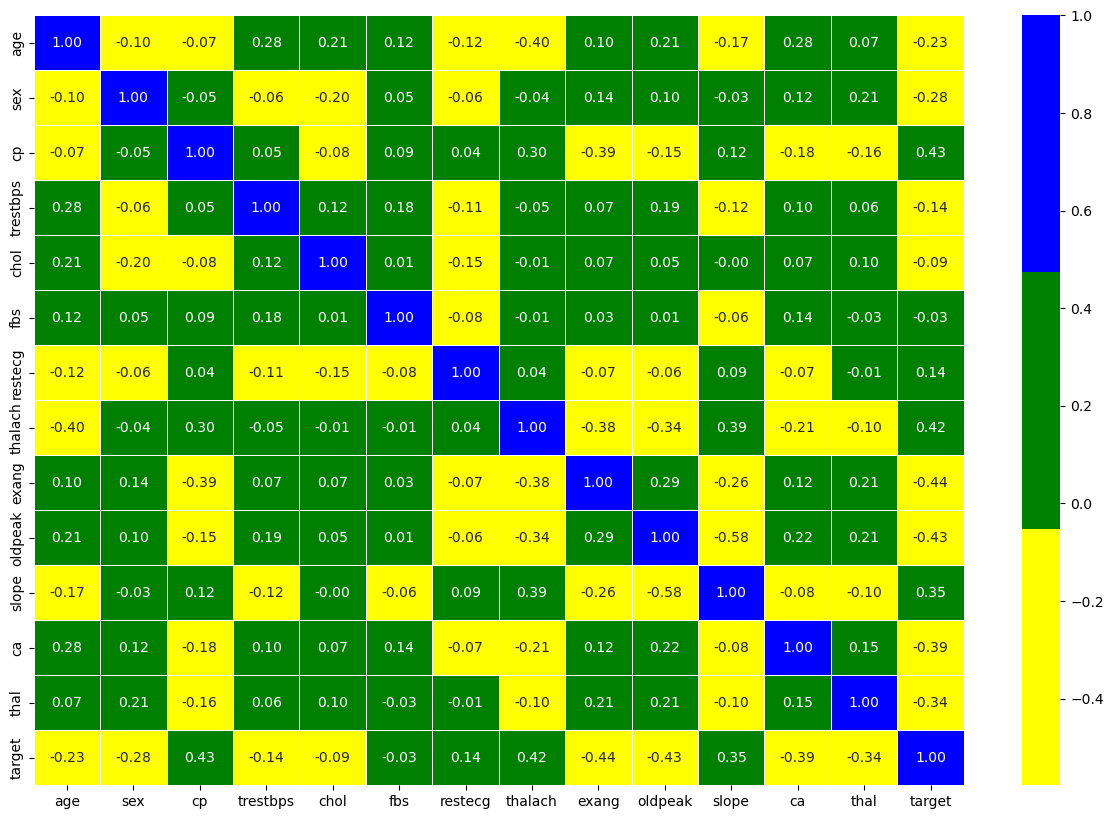

In [7]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap=['yellow', 'green', 'blue'])

In [8]:
# create X and y

X = df.drop('target', axis=1)
y = df['target']

X.shape, y.shape

((303, 13), (303,))

In [9]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

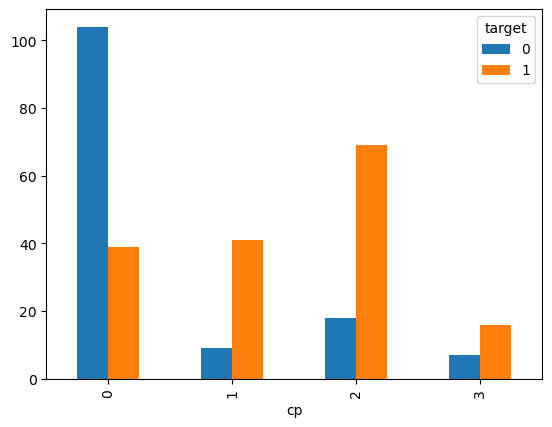

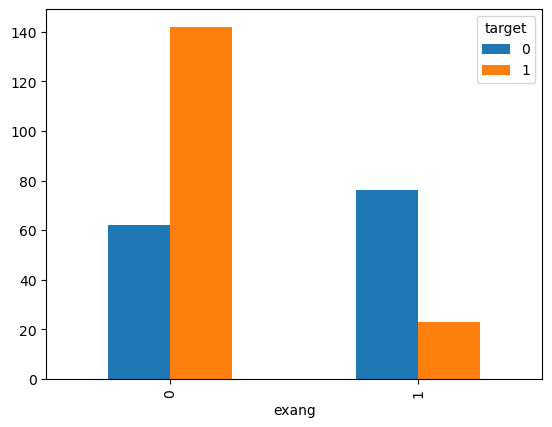

In [10]:
pd.crosstab(df.cp, df.target).plot.bar(), pd.crosstab(df.exang, df.target).plot.bar();

In [11]:
models = {
    'LogisticRegressor': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    """
    Use train set to fit model and score the test set
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    models are packaged in dictionary
    """
    np.random.seed(42)
    
    model_score = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # sabe the score
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [12]:
model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)
model_scores

C:\Users\User\Desktop\Data_Science_Notebook\env\LoHo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegressor': 0.8852459016393442,
 'GaussianNB': 0.8688524590163934,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918,
 'SVC': 0.7049180327868853}

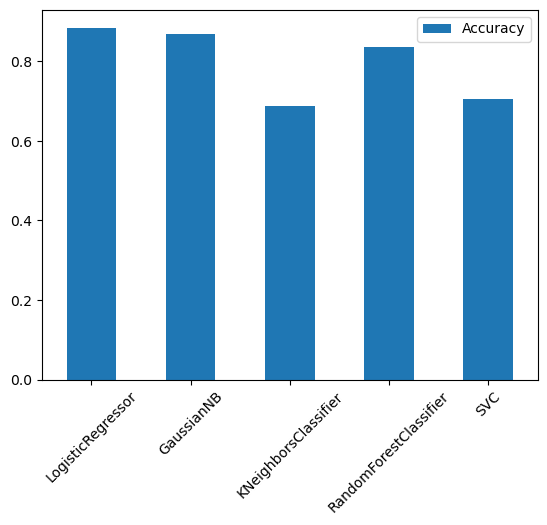

In [13]:
model_compare = pd.DataFrame(model_scores,
                             index=['Accuracy'])
model_compare.T.plot.bar(rot=45);

### Choose logisticRgression, GaussianNB and RandomForestClassifier

In [ ]:
# LogisticRegression

log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['lbfgs', 'newton-cg', 'sag'],
                'max_iter': np.arange(0, 100, 2)}

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)
gs_log_reg.fit(X_train, y_train)

In [15]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'max_iter': 18, 'solver': 'newton-cg'}

In [16]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [17]:
model_scores

{'LogisticRegressor': 0.8852459016393442,
 'GaussianNB': 0.8688524590163934,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918,
 'SVC': 0.7049180327868853}

In [ ]:
# RamdomForestClassifer

rfc_grid = {
    'n_estimators': [20, 40, 60, 80, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'oob_score': [False, True]
}

gs_rfc = GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid=rfc_grid,
                      cv=5,
                      verbose=2)
gs_rfc.fit(X_train, y_train)

In [19]:
gs_rfc.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 80,
 'oob_score': False}

In [20]:
gs_rfc.score(X_test, y_test)

0.8688524590163934

In [21]:
model_scores

{'LogisticRegressor': 0.8852459016393442,
 'GaussianNB': 0.8688524590163934,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918,
 'SVC': 0.7049180327868853}

### The accuracy in hyperparameters of LogisticRegression  is highest.

In [22]:
clf = LogisticRegression(C=0.23357214690901212,
                         max_iter=100,
                         solver='newton-cg')
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='newton-cg')

In [23]:
clf.score(X_test, y_test)

0.8852459016393442

In [24]:
y_preds = clf.predict(X_test)

In [25]:
classification_report_log_reg = classification_report(y_test, y_preds)
print(classification_report_log_reg)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [26]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

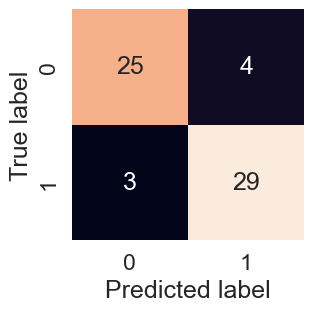

In [27]:
sns.set(font_scale=1.5)

def conf_mat_plot(y_true, y_pred):
    """
    plot the confusion matrix
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_true, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

conf_mat_plot(y_test, y_preds)

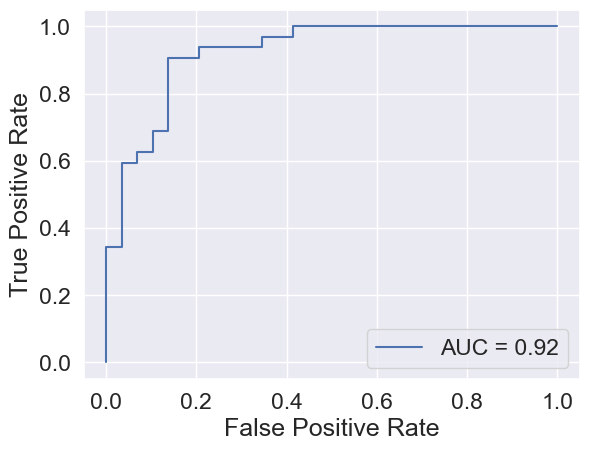

In [28]:
# 計算 tpr, fpr 並劃出 ROC_AUC_CURVE
y_probs = clf.predict_proba(X_test) # 取得預測機率
y_probs_positives = y_probs[:, 1] # 提取 positive 預測機率
fpr, tpr, threshold = roc_curve(y_test, y_probs_positives) # 取得 fpr, tpr
roc_auc = auc(fpr, tpr) # 算出 roc_auc
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # 畫出 roc_auc_curve
display.plot();

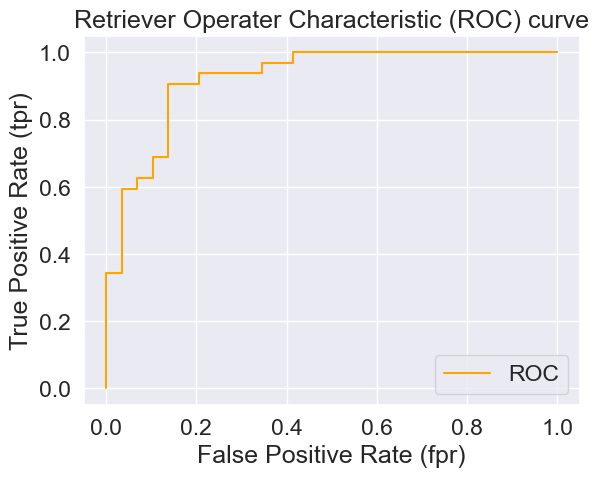

In [29]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Retriever Operater Characteristic (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

### 計算 accuracy, precision, recall, fi score

In [30]:
# Option1

# 用 cross_val_score -> 5次 取平均 -> 計算 accuracy, precision, recall, fi score
# Accuracy
cv_acc = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8380327868852457

In [31]:
# Precision
cv_precision = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8152380952380952

In [32]:
# Recall
cv_recall = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [33]:
# F1 score
cv_f1 = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8615036961776967

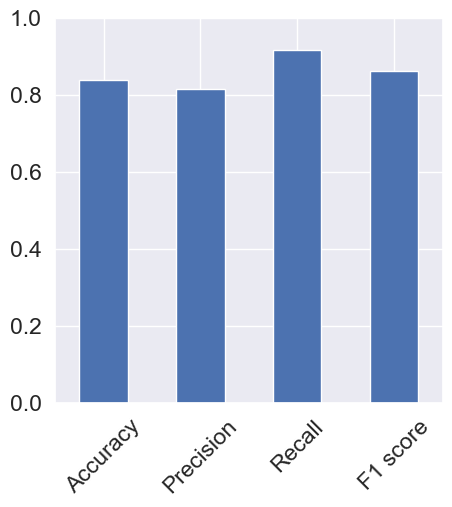

In [46]:
classification_cv = pd.DataFrame({'Accuracy': cv_acc,
                                  'Precision': cv_precision,
                                  'Recall': cv_recall,
                                  'F1 score': cv_f1},
                                 index=['Classification Report'])
classification_cv.T.plot.bar(rot=45, figsize=(5, 5), legend=False, ylim=[0, 1]);

In [35]:
# Option2

seeds = np.random.randint(1, 101, size=(5,))
accuracy =[]
precision = []
recall = []
F1 = []
for seed in seeds:
    np.random.seed(seed=seed)
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    Acc = clf.score(X_test, y_test)
    accuracy.append(Acc)
    precision.append(precision_score(y_test, Y_pred))
    recall.append(recall_score(y_test, Y_pred))
    F1.append(f1_score(y_test, Y_pred))

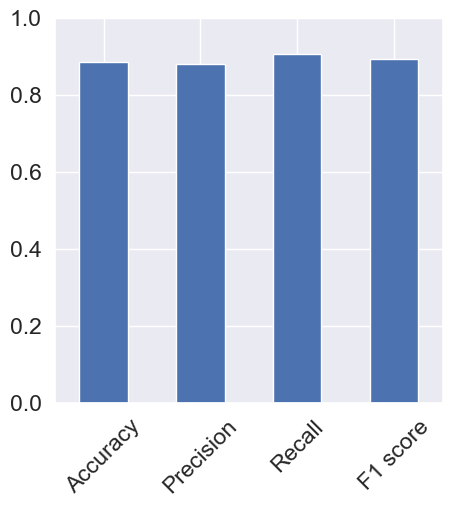

In [36]:
accuracy_avg = np.mean(accuracy)
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
F1_avg = np.mean(F1)

classification_df = pd.DataFrame({'Accuracy': accuracy_avg,
                                  'Precision': precision_avg,
                                  'Recall': recall_avg,
                                  'F1 score': F1_avg},
                                 index=['Classification Report'])
classification_df.T.plot.bar(rot=45, figsize=(5, 5), legend=False, ylim=[0, 1]);

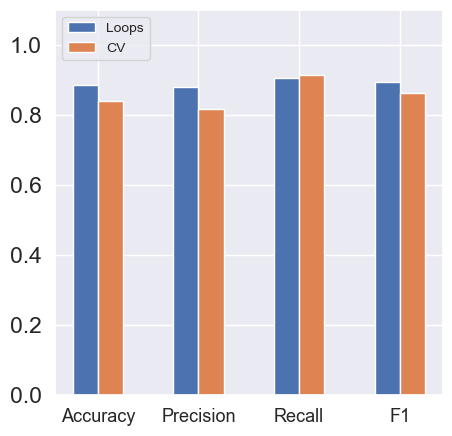

In [41]:
plt.figure(figsize=(5, 5))
width = 0.25
x_axis = ['Accuracy', 'Precision', 'Recall', 'F1']
x = range(len(x_axis))
plt.bar([x-width/2 for x in range(len(x_axis))],
        [accuracy_avg, precision_avg, recall_avg, F1_avg],
        label='Loops',
        width=width)
plt.bar([x+width/2 for x in range(len(x_axis))],
        [cv_acc, cv_precision, cv_recall, cv_f1],
        label='CV',
        width=width)
plt.xticks(ticks=x,  labels=x_axis, fontsize=13)
plt.legend(fontsize=10, loc='upper left')
plt.ylim([0, 1.1])
plt.show()

In [42]:
# feature importance

clf.coef_, df.columns

(array([[-0.00505001, -0.93160803,  0.67798263, -0.01399862, -0.00205446,
          0.06516614,  0.31131615,  0.01999995, -0.6592263 , -0.59359692,
          0.45474714, -0.6516783 , -0.73266566]]),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object'))

In [43]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.005050010868902757,
 'sex': -0.9316080263437482,
 'cp': 0.6779826283466787,
 'trestbps': -0.01399862359057656,
 'chol': -0.002054458004378082,
 'fbs': 0.06516613640265785,
 'restecg': 0.3113161486272313,
 'thalach': 0.019999947841026686,
 'exang': -0.6592262958145597,
 'oldpeak': -0.593596922969435,
 'slope': 0.4547471408472955,
 'ca': -0.6516782958757014,
 'thal': -0.7326656553224766}

<AxesSubplot: >

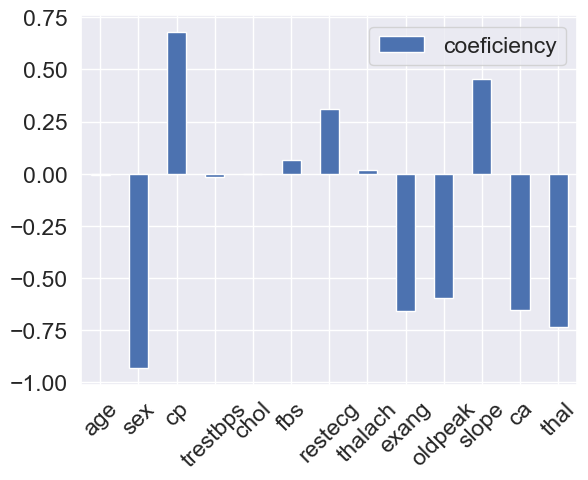

In [44]:
feature_df = pd.DataFrame(feature_dict,
                          index=['coeficiency'])
feature_df.T.plot.bar(rot=45)

In [47]:
# Remove the features taht corr below under 0.15
X = df.drop(['target', 'trestbps', 'chol', 'fbs', 'restecg'], axis=1)
y = df['target']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_scores_new = fit_and_score(models, X_train, y_train, X_test, y_test)
model_scores_new['LogisticRegressor']

C:\Users\User\Desktop\Data_Science_Notebook\env\LoHo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [48]:
model_scores['LogisticRegressor']

0.8852459016393442

From now, the best performance of models is **LogisticRegression** which has undergone the **hyperparameters tuning** and **non-related features dropping**, but the accuracy still isn't 90%. I think the data is only 303 rows, however, maybe we can collect `more data` to fit a better model to classify.